In [14]:
pip install wordcloud

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [22]:
#Reading the csv file
x= pd.read_csv("sms-spam.csv")
#Displaying the dataframe
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [24]:
#dataset size- 5572 rows * 5 columns
x.shape

(5572, 5)

In [26]:
# printing the concise information about the dataset
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
#column 2,3,4 have majority missing values, so it is better to drop them.
x.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# displaying the edited dataframe
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
#renaming the column names to a better and meaningful column name
x.rename(columns={'v1':'result','v2':'input'},inplace=True)
#displaying the edited dataframe
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
#converting all result variable values which are in categorical lables into numeric values- encoding
# to do do we will be using 'LabelEncoder' from sklearn
encoder = LabelEncoder()
x['result']=encoder.fit_transform(x['result'])
#displaying the edited dataframe
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
# 0 means no spam and 1 mean spam 
# check if there's any null values
x.isnull().sum()

result    0
input     0
dtype: int64

In [36]:
#the dataset has no null values, so don't need to handle them
# check if there is any duplicate values
x.duplicated().sum()

403

In [38]:
# dataset has many duplicate values which we need to remove
x=x.drop_duplicates(keep='first')

#displaying the edited dataset
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [40]:
# rows has reduced from 5572nto 5169 after removal of duplicated values

In [42]:
# the given problem is a classification problem, so we need to understand the data first by performing some operations.
# the dataset has only 2 columns, so less analysis required.

In [46]:
#checking the number of SPAM vs NOTSPAM messages
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [48]:
# out of 5169, 653 are spam 

In [50]:
653*100.0/5169

12.633004449603405

In [52]:
# 12.63% are spam messages and 87.37% is not spam
# for better representation we can use PIE CHART by using matplotlib library.

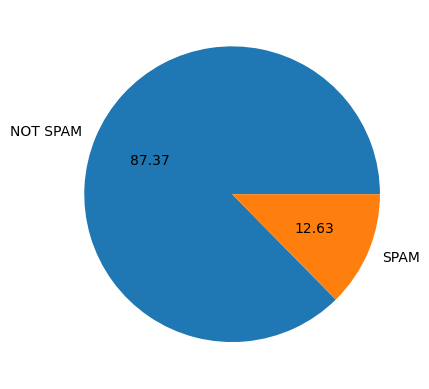

In [58]:
plt.pie(x['result'].value_counts(), labels=['NOT SPAM','SPAM'], autopct='%0.2f',radius=1)
plt.show()

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
#downloading the dependencies
#punkt package includes pre-trained models for tokenizing text in many languages
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shravani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#creating a new column with count of characters
x['countCharacters']=x['input'].apply(len)

#creating a new column with count of words
x['countWords']=x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
# 'word_tokenize' function takes a string of text as input and returns the list of words

#creating a new column with count of sentences
x['countSentences']=x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
# 'sent_tokenize' function takes a string of text as input and returns a list of sentences

In [66]:
# displaying the edited dataframe with the 3 new columns added
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
#extracting the 5 number summary of the 3 new column values
x[['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
# extracting the same summaries, classified on the basis of SPAM and NOT SPAM
#for SPAM
x[x['result']== 1][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [76]:
# for NOT SPAM
x[x['result']== 0][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

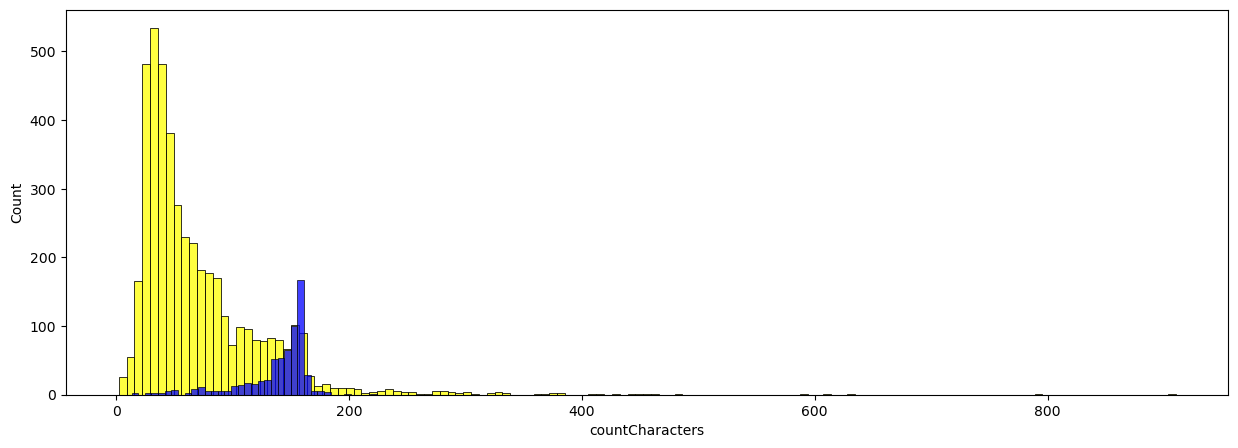

In [84]:
# for better visualization , we will add a histgram using 'seaborn'
plt.figure(figsize=(15,5))
sns.histplot(x[x['result']==0]['countCharacters'],color="yellow")
sns.histplot(x[x['result']==1]['countCharacters'],color="blue")
#black=> SPAM, yellow=> NOT SPAM

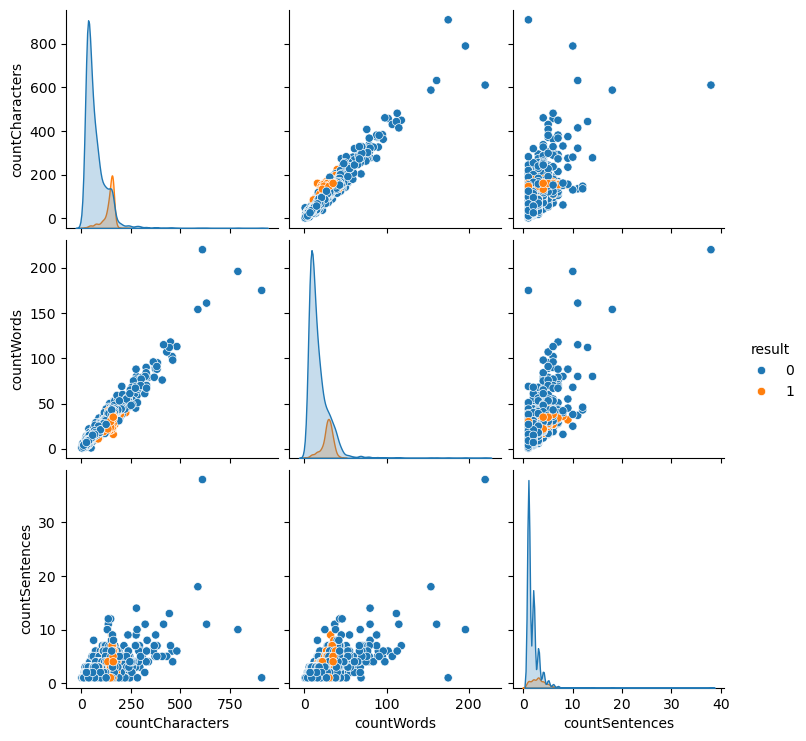

In [86]:
#vfinding relationship between the columns
sns.pairplot(x, hue='result')

In [88]:
#performing preprocessing such as tokenization 
#removing stopwards and punctuations and finally stemming the data
#also, converting to lowercase first and then pre-processing the data

In [90]:
# downloading the package which contains the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shravani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    # Converting to lowercase
    text = text.lower()
    
    # Tokenization
    text = word_tokenize(text)
    
    # Removing special characters (keeping only alphanumeric words)
    removedSC = [i for i in text if i.isalnum()]
    
    # Removing stopwords and punctuation
    removedSWPC = [i for i in removedSC if i not in stopwords.words('english') and i not in string.punctuation]
    
    # Stemming using PorterStemmer
    ps = PorterStemmer()
    stemmed = [ps.stem(i) for i in removedSWPC]
    
    # Returning processed text as a single string
    return " ".join(stemmed)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shravani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shravani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
#function for transforming the text is ready

In [117]:
#will create a new column to store the transformed text: 'processed'
x['processed']=x['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [119]:
# will create a new column to store the transformed text--> 'processed'
x['processed']=x['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [123]:
#will be creating a wordcloud for data visualization to display the most frequently occuring words using wordcloud class
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

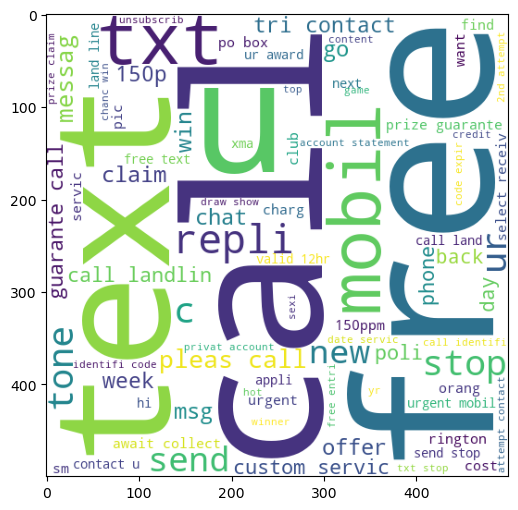

In [125]:
#creating a wordcloud for the spam messages
spamWC=wc.generate(x[x['result']==1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12,6))
plt.imshow(spamWC)

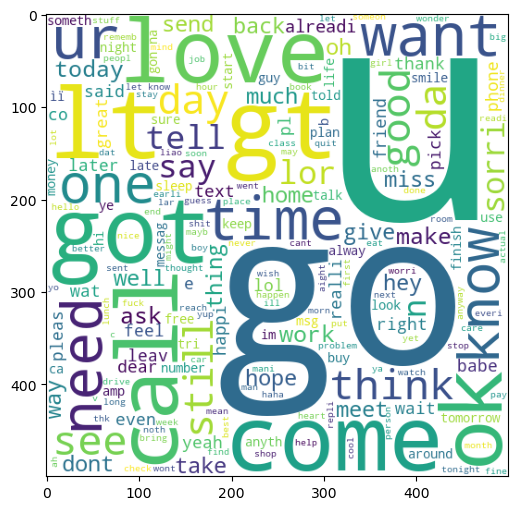

In [127]:
#creating a wordcloud for the not spam messages
spamWC = wc.generate(x[x['result']==0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12,6))
plt.imshow(spamWC)

In [129]:
#extracting all the words used in spam messages
spamWords= list()

for msg in x[x['result']==1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [131]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary= Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [135]:
# converting this dictionary to a dataframe
mostcommonSPAM=pd.DataFrame(spamWordsDictionary.most_common(40))

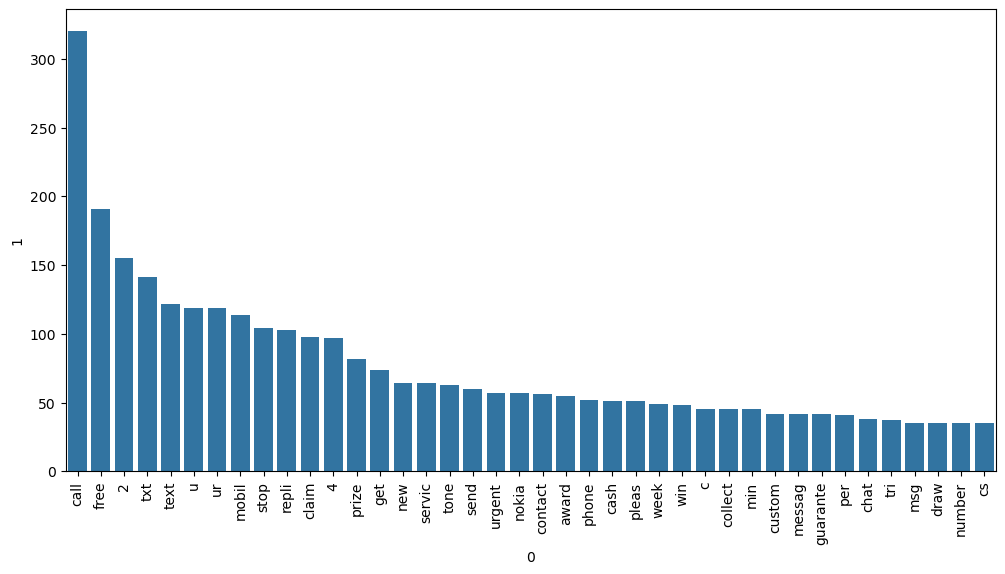

In [139]:
#plotting a barplot of the msot commonSPAM dataframe
plt.figure(figsize=(12,6))
sns.barplot(data=mostcommonSPAM,x=0,y=1)
plt.xticks(rotation='vertical')
plt.show()

In [141]:
#NaiveBayes classifier works BEST on textual data,so will firstly perform it on dataset

In [143]:
#we need to give numerical inputs to the classifier model ,so will have to convert the 'processed' using 'bag of words'

In [145]:
#converting the collection of texts into a matrix of token counts
cv= CountVectorizer()

In [149]:
#transforming the data of processed column 
X= cv.fit_transform(x['processed']).toarray()

#printing size of x
X.shape

(5169, 6708)

In [151]:
#storing the values of the 'result' column
y=x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
#splitting the traning and testing dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=49)

In [159]:
#creating the object for the model
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [161]:
#training the dataset for GaussianNB

In [163]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [165]:
#Training the dataset for MultinomialNB
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [167]:
#Training the dataset for BernoulliNB
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [169]:
#model is prepared. now we to host the website for that pipeling needs to be done.the text which we will be getting has to be transformed first 
# then vctorize and then apply the algorithm
# we will pickel 2 files


In [177]:
# we have to focus only on precision value
# the max precision we got is 9.45 with 9.64 as accuraccy
# using TfidfVectorizer for vectorization

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

#transforming the data of processed column
X= tf.fit_transform(x['processed']).toarray()

#storing the values of 'result' column
y=x['result'].values

#splitting the training and testing dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=49)

In [191]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [193]:
#Training the dataset for MultinomialNB
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [195]:
#Training the dataset for BernoulliNB
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [197]:
#model is prepared. now we have to host the website, fr that pipelining is to be done. the text we will get has to be teansformed first, then vectorized and then apply the algorithm.
#we will pickle 2 files

In [201]:
#import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))